<a href="https://colab.research.google.com/github/megha988/Virtual-Lab-Using-ML-Algorithm/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv


{'train.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y\r\n

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [10]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [14]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
def gend(x):
    if x=='Male':
        return 4
    if x=='Female':
        return 6

In [16]:
df['Gender']=df['Gender'].apply(gend)

In [17]:
def marry(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0

In [18]:
df['Married']=df['Married'].apply(marry)

In [19]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [20]:
def depend(x):
    if x=='0':
        return 0
    if x=='1':
        return 1
    if x=='2':
        return 2
    if x=='3+':
        return 3

In [21]:
df['Dependents']=df['Dependents'].apply(depend)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,4,0,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,4,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,4,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,4,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,4,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
def emp(x):
    if x=='Yes':
        return 1
    if x=='No':
        return 0

In [24]:
df['Self_Employed']=df['Self_Employed'].apply(emp)

In [25]:
def edu(x):
    if x=='Graduate':
        return 1
    if x=='Not Graduate':
        return 0

In [26]:
df['Education']=df['Education'].apply(edu)

In [27]:
def state(x):
    if x=='Rural':
        return 0
    if x=='Semiurban':
        return 1
    if x=='Urban':
        return 2

In [28]:
df['Property_Area']=df['Property_Area'].apply(state)

In [29]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

In [30]:
from google.colab import files
files.upload()

Saving test.csv to test (1).csv


{'test.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,Urban\r\nLP001094,Male,Yes,2,Graduate,,12173

In [51]:
test_df=pd.read_csv('test.csv')

In [52]:
final_df=pd.concat([df,test_df],axis=0)
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [53]:
final_df.info()
final_df.drop(['Loan_ID'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             970 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         971 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      958 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         976 non-null    float64
 9   Loan_Amount_Term   975 non-null    float64
 10  Credit_History     952 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Type               614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
Type                  object
dtype: object

In [55]:
from sklearn import metrics
from sklearn.model_selection import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.1%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold( n_splits=5)
    error = []
    for train, test in kf.split(data[predictors]):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [56]:
df['Type']='Train'
test_df['Type']='Test'
fullData = pd.concat([df,test_df], axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
Loan_Status          367
Type                   0
dtype: int64

In [57]:
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

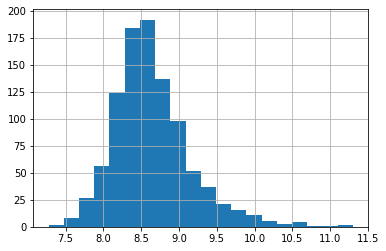

In [58]:
fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20)

In [59]:
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [62]:
import sys

In [63]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed','Loan_Amount_Term','ApplicantIncome','CoapplicantIncome']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values